In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

df = pd.read_csv('stud_math.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [6]:
df.school

0      GP
1      GP
2      GP
3      GP
4      GP
       ..
390    MS
391    MS
392    MS
393    MS
394    MS
Name: school, Length: 395, dtype: object

In [21]:
df.apply(lambda x: (222 if (x.school == 'MS' and x.address == 'U') or (x.school == 'GP' and x.address == 'R') \
                    else ((444 if (x.school == 'MS' and x.address == 'R') or (x.school == 'GP' and x.address == 'U') else 999)))
    if pd.isna(x.traveltime) else x.traveltime, axis=1).value_counts()

1.0      242
2.0       96
3.0       22
444.0     19
4.0        7
222.0      6
999.0      3
dtype: int64

In [ ]:
stud['traveltime'] = stud.apply(lambda x: ((2 if (x.school == 1 and x.address == 'U') or (x.school == 0 and x.address == 'R') else 4 if (x.school == 1 and x.address == 'R') or (x.school == 0 and x.address == 'U'))) if pd.isna(x.traveltime) else x.traveltime, axis=1)

## Часть первая. Ознакомительная
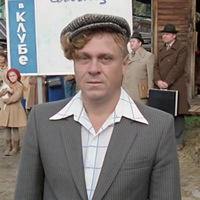

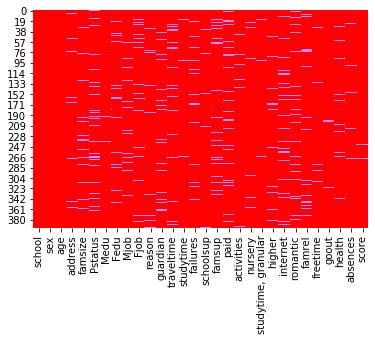

In [31]:
#Начнем с пропусков
# определяем цвета 
# желтый - пропущенные данные, красный - не пропущенные
colours = ['#FF0000', '#FF88FF'] 
sns.heatmap(df.isnull(), cbar=False, cmap=sns.color_palette(colours))

In [3]:
print(f'There are {len(df.dropna())} rows in dataset without missing values \
of {len(df)} total rows')
print(f'There are {df.isnull().any().sum()} columns in dataset with missing \
values.')
print(f'{df.shape[0]} samples and {df.shape[1]} features in the dataset.')

There are 97 rows in dataset without missing values of 395 total rows
There are 27 columns in dataset with missing values.
395 samples and 30 features in the dataset.


*Пропуски разбросаны по датафрейму, простое удаление строк с пропусками   
приводит к потере около 3/4 всех данных. Необходима работа с пропусками.*

In [4]:
#найдем количество пропусков в строках датасета и сгруппируем их.
df.apply(lambda x: pd.isna(x).sum(), axis=1).value_counts()

1    131
2     98
0     97
3     47
4     15
5      5
6      2
dtype: int64

*Строчек в датесете содержащих значительное количество  пропусков  (хотя бы более половины) не найдено, по этому принципу очистка невозможна.*

In [ ]:
# Разделим колонки по типам переменных, содержащихся в них.
cat_cols = df.columns[df.dtypes == 'O'].to_list()
num_cols_y = df.columns[df.dtypes == 'float64'].to_list()
num_cols = num_cols_y.remove('score')

Поскольку уникальных значений в датасете не так много, просто выведем их количество для каждого столбца. Это позволит сразу оценить и количество пропусков и явные выбросы.

In [30]:
for feature in df.columns:
    print(df[feature].value_counts(dropna=False))
    

GP    349
MS     46
Name: school, dtype: int64
F    208
M    187
Name: sex, dtype: int64
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
U      295
R       83
NaN     17
Name: address, dtype: int64
GT3    261
LE3    107
NaN     27
Name: famsize, dtype: int64
T      314
NaN     45
A       36
Name: Pstatus, dtype: int64
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
NaN      3
Name: Medu, dtype: int64
2.0     106
3.0      96
4.0      88
1.0      78
NaN      24
0.0       2
40.0      1
Name: Fedu, dtype: int64
other       133
services     98
at_home      58
teacher      55
health       32
NaN          19
Name: Mjob, dtype: int64
other       197
services    102
NaN          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64
course        137
home          104
reputation    103
other          34
NaN            17
Name: reason, dtype: int64
mother    250
father     86
NaN        31
other      28
Name: gua

Посмотрим на корреляцию числовых признаков в наших данныьх:

In [2]:
fig, ax = plt.subplots(figsize=(10, 10))
corr = df.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True,  fmt='.2g', mask=matrix,
            vmin=-1, vmax=0.4)

NameError: name 'plt' is not defined

Бросается в глаза 100 процентная корреляция между **'studytime, granular'** 
и **'studytime'**. Пасхалка от составителя задания найдена. Первый столбец
удалим. Остальные значения явных аномалий не имеют и проходят в следующий этап.